# Assignment 2

    Ansharulhaq Aminsyah (PYTN-KS009-012)
    Intro to python for data science

In [1]:
import numpy as np
import pandas as pd
import statistics
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_can = pd.read_csv('nyc-rolling-sales.csv')
pd.set_option('display.max_columns',999)

# Exploratory and Data Cleaning (EDA)

In [3]:
df_can.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
# Rename value pada BOROUGH menjadi string nama seperti yang sudah di instruksikan pada tugas.
df_can['BOROUGH'][df_can['BOROUGH'] == 1] = 'Manhattan'
df_can['BOROUGH'][df_can['BOROUGH'] == 2] = 'Bronx'
df_can['BOROUGH'][df_can['BOROUGH'] == 3] = 'Brooklyn'
df_can['BOROUGH'][df_can['BOROUGH'] == 4] = 'Queens'
df_can['BOROUGH'][df_can['BOROUGH'] == 5] = 'Staten Island'
df_can.head()

C:\Users\Ulhaq\AppData\Local\Temp\ipykernel_8900\3957294686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_can['BOROUGH'][df_can['BOROUGH'] == 1] = 'Manhattan'


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
df_can.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [6]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  object
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [7]:
# Buang kolom Unnamed: 0 yang tidak diketahui apa kegunaannya dan Kolom EASE-MENT yang valuenya sama sekali tidak ada alias kosong.
df_can.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace=True)
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  object
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [8]:
# Terlihat pada kolom tabel ada yang memiliki tipe data yang tidak sesuai seperti SALE PRICE yang bertipe data object yang seharusnya numeric dan SALE DATE yang seharusnya datetime.
# Selanjutnya melakukan perubahan tipe data
df_can['BOROUGH'] = df_can['BOROUGH'].astype('string')
df_can['NEIGHBORHOOD'] = df_can['NEIGHBORHOOD'].astype('string')
df_can['BUILDING CLASS CATEGORY'] = df_can['BUILDING CLASS CATEGORY'].astype('category')
df_can['TAX CLASS AT PRESENT'] = df_can['TAX CLASS AT PRESENT'].astype('category')
df_can['BUILDING CLASS AT PRESENT'] = df_can['BUILDING CLASS AT PRESENT'].astype('category')
df_can['ADDRESS'] = df_can['ADDRESS'].astype('string')
df_can['APARTMENT NUMBER'] = df_can['APARTMENT NUMBER'].astype('string')
df_can['LAND SQUARE FEET'] = pd.to_numeric(df_can['LAND SQUARE FEET'], errors='coerce')
df_can['GROSS SQUARE FEET'] = pd.to_numeric(df_can['GROSS SQUARE FEET'], errors='coerce')
df_can['BUILDING CLASS AT TIME OF SALE'] = df_can['BUILDING CLASS AT TIME OF SALE'].astype('category')
df_can['SALE PRICE'] = pd.to_numeric(df_can['SALE PRICE'], errors='coerce')
df_can['SALE DATE'] = pd.to_datetime(df_can['SALE DATE'], errors='coerce')
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  string        
 1   NEIGHBORHOOD                    84548 non-null  string        
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  string        
 8   APARTMENT NUMBER                84548 non-null  string        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [9]:
# Selanjutnya pengecekan apakah ada value yang bernilai null
df_can.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [10]:
# Ternyata terdapat value null pada kolom LAND SQUARE FEET, GROOS SQUARE FEET dan SALE PRICE
# Selanjutnya membersihkan value null pada kolom-kolom tersebut
df_can = df_can[df_can['GROSS SQUARE FEET'].notnull()]
df_can = df_can[df_can['SALE PRICE'].notnull()]
df_can = df_can[df_can['LAND SQUARE FEET'].notnull()]
df_can.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [11]:
# Selanjutnya lihat ringkasan singkat pada setiap kolom dengan describe()
df_can.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,4.824400e+04,4.824400e+04,48244.000000,48244.000000,4.824400e+04
mean,4984.532191,234.324662,10939.681328,2.566537,0.249171,2.834632,3.358117e+03,3.669753e+03,1827.765173,1.475769,1.153281e+06
std,3427.418090,496.361521,1072.752086,17.465481,10.988072,20.750418,3.143590e+04,2.947491e+04,464.361153,0.833589,1.340131e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2206.750000,21.000000,10469.000000,1.000000,0.000000,1.000000,1.413000e+03,8.280000e+02,1920.000000,1.000000,8.042000e+04
50%,4660.500000,45.000000,11217.000000,1.000000,0.000000,1.000000,2.140000e+03,1.620000e+03,1931.000000,1.000000,4.800000e+05
75%,6996.000000,94.000000,11237.000000,2.000000,0.000000,2.000000,3.071000e+03,2.520000e+03,1961.000000,2.000000,8.300000e+05
max,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [12]:
# Terdapat beberapa hal yang menjanggal pada beberapa kolom, yaitu ada yang memiliki value 0 pada kolom ZIP CODE, RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET, dan YEAR BUILT. Meskipun RESIDENTIAL UNITS, COMMERCIAL UNITS memliki value 0, namun hal itu tidak masalah karena tiap jenis unit ada yang bernilai 0, kecuali TOTAL UNIT yang seharusnya minimal ada 1.
# Selanjutnya, kita akan mengambil data yang memiliki nilai diatas 0, dan menghapus data yang bervalue 0 dari observasi kita. Serta menyimpannya ke variabel sementara.
df_temp = df_can[
    (df_can['TOTAL UNITS'] != 0) &
    (df_can['LAND SQUARE FEET'] != 0) &
    (df_can['GROSS SQUARE FEET'] != 0) &
    (df_can['YEAR BUILT'] != 0) &
    (df_can['SALE PRICE'] != 0) &
    (df_can['ZIP CODE'] != 0)]

In [13]:
df_can = df_temp
df_can.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,29270.000000,29270.000000,29270.000000,29270.000000,29270.000000,29270.000000,2.927000e+04,2.927000e+04,29270.000000,29270.000000,2.927000e+04
mean,5550.708097,61.181654,10997.383123,3.054493,0.329757,3.382849,4.204053e+03,4.602588e+03,1940.690571,1.228562,1.637125e+06
std,3780.050656,116.561248,476.344549,20.041605,14.031267,24.600632,3.548674e+04,3.413059e+04,30.528042,0.685628,1.701132e+07
min,5.000000,1.000000,10001.000000,0.000000,0.000000,1.000000,2.000000e+02,1.200000e+02,1800.000000,1.000000,1.000000e+00
25%,2678.500000,19.000000,10462.000000,1.000000,0.000000,1.000000,2.000000e+03,1.360000e+03,1920.000000,1.000000,4.200000e+05
50%,4903.000000,38.000000,11221.000000,2.000000,0.000000,2.000000,2.500000e+03,1.872000e+03,1930.000000,1.000000,6.200000e+05
75%,7837.750000,64.000000,11373.000000,2.000000,0.000000,2.000000,4.000000e+03,2.672000e+03,1960.000000,1.000000,9.500000e+05
max,16319.000000,3710.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [14]:
df_can.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


---
# A. Measure of Central Tendency : Mean

In [15]:
# Question : Berapa harga rata - rata properti berdasarkan BOROUGH?, Tampilkan 5 data teratas

In [45]:
#  Processing
df_mean = df_can.pivot_table( index='BOROUGH',                      # Sebagai Index
                              values='SALE PRICE',                  # Sebagai Values
                              aggfunc=np.mean)                      # Menggunakan NumPy dimana np.mean yang akan menghitung nilai rata - rata atau mean.

In [46]:
df_mean.head()

,SALE PRICE
BOROUGH,
Bronx,1.022962e+06
Brooklyn,1.502450e+06
Manhattan,1.855378e+07
Queens,9.087225e+05
Staten Island,5.273297e+05


In [48]:
df_mean.rename(columns={'SALE PRICE':'SALE PRICE MEAN'}, inplace=True)      # Rename kolom SALE PRICE menjadi SALE PRICE MEAN
df_mean.sort_values('SALE PRICE MEAN', ascending=False, inplace=True)       # Sort df berdasarkan kolom SALE PRICE MEAN
df_mean.head()

,SALE PRICE MEAN
BOROUGH,
Manhattan,1.855378e+07
Brooklyn,1.502450e+06
Bronx,1.022962e+06
Queens,9.087225e+05
Staten Island,5.273297e+05


---
# B. Measure of Central Tendency : Median

In [19]:
# Question : Berapa median harga properti berdasarkan BUILDING CLASS CATEGORY?, Tampilkan data 5 terbawah

In [20]:
# Processing
df_median = df_can.pivot_table(index='BUILDING CLASS CATEGORY',       # Sebagai Index
                              values='SALE PRICE',                    # Sebagai Values
                              aggfunc=np.median)                      # Menggunakan NumPy dimana np.median yang akan mencari nilai median.

In [21]:
df_median.tail()

,SALE PRICE
BUILDING CLASS CATEGORY,
36 OUTDOOR RECREATIONAL FACILITIES,5000000.0
37 RELIGIOUS FACILITIES,1600000.0
38 ASYLUMS AND HOMES,4874798.0
40 SELECTED GOVERNMENTAL FACILITIES,8000000.5
41 TAX CLASS 4 - OTHER,1100000.0


In [22]:
df_median.rename(columns={'SALE PRICE':'SALE PRICE MEDIAN'}, inplace=True)      # Rename kolom SALE PRICE menjadi SALE PRICE MEDIAN
df_median.sort_values('SALE PRICE MEDIAN', ascending=False, inplace=True)       # Sort dataframe berdasarkan kolom SALE PRICE MEDIAN
df_median.tail()

,SALE PRICE MEDIAN
BUILDING CLASS CATEGORY,
01 ONE FAMILY DWELLINGS,500000.0
06 TAX CLASS 1 - OTHER,252000.0
09 COOPS - WALKUP APARTMENTS,227500.0
10 COOPS - ELEVATOR APARTMENTS,195000.0
26 OTHER HOTELS,53910.0


---
# B. Measure of Central Tendency : Mode

In [23]:
# Question : Kategori kelas properti apa yang paling sering dibangun 5 tahun terakhir pada data?

In [24]:
# Processing
df_mode = df_can.pivot_table(index='YEAR BUILT',                        # Sebagai Index
                              values='BUILDING CLASS CATEGORY',         # Sebagai Values
                              aggfunc=stats.mode)                       # Menggunakan NumPy dimana stats.mode yang akan mencari modus pada BUILDING CLASS CATEGORY.

c:\Python\lib\site-packages\pandas\core\groupby\groupby.py:1476: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  f = lambda x: func(x, *args, **kwargs)
c:\Python\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [25]:
df_mode.tail()

,BUILDING CLASS CATEGORY
YEAR BUILT,
2013,([02 TWO FAMILY DWELLINGS ]...
2014,([02 TWO FAMILY DWELLINGS ]...
2015,([01 ONE FAMILY DWELLINGS ]...
2016,([01 ONE FAMILY DWELLINGS ]...
2017,([02 TWO FAMILY DWELLINGS ]...


In [26]:
df_mode.sort_values('YEAR BUILT', ascending=False, inplace=True)       # Sort dataframe berdasarkan kolom YEAR BUILT
df_mode.head()

,BUILDING CLASS CATEGORY
YEAR BUILT,
2017,([02 TWO FAMILY DWELLINGS ]...
2016,([01 ONE FAMILY DWELLINGS ]...
2015,([01 ONE FAMILY DWELLINGS ]...
2014,([02 TWO FAMILY DWELLINGS ]...
2013,([02 TWO FAMILY DWELLINGS ]...


---
# B. Measure of Spread : Range

In [27]:
# Question : Berapa range termurah dan termahal harga properti berdasarkan BUILDING CLASS CATEGORY?, Pilih 5 teratas

In [28]:
# Processing
df_range = df_can.pivot_table(index='BUILDING CLASS CATEGORY',          # Sebagai Index
                              values='SALE PRICE',                      # Sebagai Values
                              aggfunc=np.ptp)                           # Menggunakan NumPy dimana np.ptp yang akan mencari range harga berdasarkan BUILDING CLASS CATEGORY.

In [29]:
df_range.head()

,SALE PRICE
BUILDING CLASS CATEGORY,
01 ONE FAMILY DWELLINGS,40999999.0
02 TWO FAMILY DWELLINGS,43499999.0
03 THREE FAMILY DWELLINGS,27399999.0
05 TAX CLASS 1 VACANT LAND,1372307.0
06 TAX CLASS 1 - OTHER,1899990.0


In [30]:
df_range.rename(columns={'SALE PRICE': 'SALE PRICE RANGE'}, inplace=True)
df_range.head()

,SALE PRICE RANGE
BUILDING CLASS CATEGORY,
01 ONE FAMILY DWELLINGS,40999999.0
02 TWO FAMILY DWELLINGS,43499999.0
03 THREE FAMILY DWELLINGS,27399999.0
05 TAX CLASS 1 VACANT LAND,1372307.0
06 TAX CLASS 1 - OTHER,1899990.0


---
# B. Measure of Spread : Variance

In [31]:
# Question : Berapakah variance harga properti berdasarkan area atau BOROUGH?, Tampilkan 5 data teratas

In [32]:
# Processsing
df_var = df_can.pivot_table(index='BOROUGH',                    # Sebagai Index
                            values='SALE PRICE',                # Sebagai Value
                            aggfunc=statistics.variance)        # Menggunakan NumPy dimana statistic.variance yang akan menghasilkan nilai variance harga berdasarkan BOROUGH.

In [33]:
df_var.rename(columns={'SALE PRICE':'SALE PRICE VARIANCE'}, inplace=True)
df_var.head()

,SALE PRICE VARIANCE
BOROUGH,
Bronx,1.446067e+13
Brooklyn,2.233832e+13
Manhattan,7.748030e+15
Queens,1.383419e+13
Staten Island,2.178743e+11


---
# B. Measure of Spread : Standard Devitation

In [34]:
# Question : Berapakah Standard Devitation harga properti berdasarkan area atau BOROUGH?, Tampilkan 5 data terbawah saja

In [35]:
# Processsing
df_std_devitation = df_can.pivot_table(index='BOROUGH',                    # Sebagai Index
                            values='SALE PRICE',                # Sebagai Value
                            aggfunc=statistics.stdev)        # Menggunakan NumPy dimana statistic.variance yang akan menghasilkan nilai variance harga berdasarkan BOROUGH.

In [36]:
df_std_devitation.rename(columns={'SALE PRICE':'SALE PRICE Std. Devitation'}, inplace=True)
df_std_devitation.sort_values('SALE PRICE Std. Devitation', ascending=True, inplace=True)
df_std_devitation.tail()

,SALE PRICE Std. Devitation
BOROUGH,
Staten Island,4.667700e+05
Queens,3.719434e+06
Bronx,3.802718e+06
Brooklyn,4.726343e+06
Manhattan,8.802290e+07


---
# Probability Distribution

In [37]:
# Question : Bagaimana bentuk distribusi harga properti diantara $2,000,000 - $7,000,000 TAX CLASS AT PRESENT?,

In [38]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

In [39]:
df_prb_distri = df_can
# Buat kolom dengan nama SALE YEAR yang akan diisikan dengan year pada kolom SALE DATE
df_prb_distri['SALE YEAR'] = pd.DatetimeIndex(df_prb_distri['SALE DATE']).year

# Selanjutnya melakukan filter pada kolom SALE YEAR dan yang diambil harus bernilai 2016, yang artinya hanya mengambil data pada tahun 2016.
# Dilanjutkan dengan kolom SALE PRICE yang diambil harus diantara sama dengan 2000000 - 7000000.
df_prb_distri = df_prb_distri[(df_prb_distri['SALE YEAR'] == 2016) & 
                      (df_prb_distri['SALE PRICE'] >= 2000000) &
                      (df_prb_distri['SALE PRICE'] <= 7000000)]['SALE PRICE']

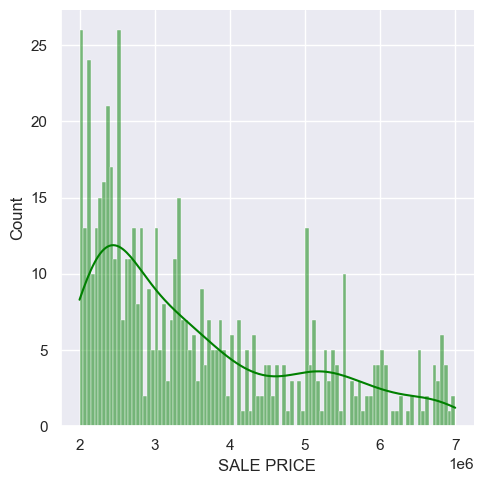

In [40]:
ax = sns.displot(df_prb_distri,
                 bins=100,
                 kde=True,
                 color='green')

In [44]:
# Conclusion
# Terlihat pada grafik diatas bahwa properti dengan rentang harga 2.000.000 - 7.000.000 yang penjualannya sedikit menaik di angka 2.000.000 - 3.000.000, lalu akhirnya menurun walaupun sempat naik beberapa saat lalu menurun lagi. Dari hal ini dapat disimpulkan bahwa semakin murah harga properti semakin banyak properti yang terjual, sebaliknya semakin mahal properti semakin sedikit properti yang terjual.

---
# Confidence Intervals

In [ ]:
# Question : Berapakah confidence intervals harga properti pada area Queens?

In [ ]:
# Ambil mean, standar deviasi, dan size dari SALE PRICE berdasarkan BOROUGH
df_ci = df_can.groupby('BOROUGH').agg({'SALE PRICE':[np.mean, np.std, np.size]})

In [ ]:
# Selanjutnya mengambi niai mean, std, dan size pada Queens dari koom BOROUGH
mean = df_ci.loc['Queens']['SALE PRICE']['mean']
sd = df_ci.loc['Queens']['SALE PRICE']['std']
n = df_ci.loc['Queens']['SALE PRICE']['size']
z = 1.96                                          # 1.96 adalah nilai z untuk confidence level 95% (berdasarkan materi sesi 10)

# Lalu mencari standar error
se = sd / np.sqrt(n)

# Terakhir mencari CI
lcb = mean - z * se
ucb = mean + z * se
lcb,ucb

(839393.6001116713, 978051.3831568465)

---
# Hypothesis Testing

In [ ]:
# Question : Berdasarkan data dan hasil sebelumnya, apakah wilayah Manhattan memiliki rata - rata harga properti yang jauh lebih tinggi dibandingkan wilayah Bronx?, Null Hypothesis : μ1 = μ2, Alternative Hypothesis : μ1 ≠ μ2

In [ ]:
df_manhat = df_can[df_can['BOROUGH'] == 'Manhattan']
df_bronx = df_can[df_can['BOROUGH'] == 'Bronx']

n1 = len(df_manhat)
mu1 = df_manhat['SALE PRICE'].mean()
sd1 = df_manhat['SALE PRICE'].std()

n2 = len(df_bronx)
mu2 = df_bronx['SALE PRICE'].mean()
sd2 = df_bronx['SALE PRICE'].std()

sm.stats.ztest(df_manhat['SALE PRICE'], df_bronx['SALE PRICE'], alternative='two-sided')

(11.759325304189357, 6.323759816976458e-32)

In [ ]:
# Conclusion : 
# Terlihat p-value yang lebih besar dari alpha, bisa dikatakan fail to reject Null Hypothesis.

---
```
# Overall Analysis

1. Kategori properti termahal adalah 01 ONE FAMILY DWELLINGS dan yang termurah adalah 06 TAX CLASS 1 - OTHER
2. Bisa dikatakan, Manhattan merupakan harga properti yang tertinggi
3. Antara Manhattan dan Bronx, perbandingan harga propertinya bisa dibilang jauh lebih murah di area Bronx
4. Rentang penjualan yang semakin menurun pertahunnya ketika harga properti yang semakin mahal.



```